In [106]:
from lifelines import CoxPHFitter

f = pd.read_table('c://Users/gy40/Desktop/test.txt',sep=',')
df = f.drop(['id','T','M','N'],axis=1)

In [107]:
df.head()

,gender,age,race,stage,grade,fustat,futime
0,MALE,57,None,Stage I,G2,Dead,1781
1,MALE,51,WHITE,None,GX,Alive,114
2,MALE,77,WHITE,Stage IIIA,GX,Dead,556
3,MALE,66,ASIAN,Stage IIA,G2,Dead,180
4,MALE,59,ASIAN,Stage IIA,G2,Alive,400


In [108]:
m1 = {'MALE':'1','FEMALE':'0'}
m2 = {'None':'0','WHITE':'1','ASIAN':'2','BLACK OR AFRICAN AMERICAN':'3'}
m3 = {'None':'0','Stage II':'1','Stage IVB':'2','Stage IB':'3','Stage IVA':'4','Stage IA':'5','Stage IIIC':'6','Stage I':'7','Stage IIIB':'8','Stage IV':'9','Stage IIIA':'10','Stage III':'11','Stage IIB':'12','Stage IIA':'13'}
m4 = {'G1':'0','G2':'1','G3':'2','GX':'3'}
m5 = {'Dead':'0','Alive':'1'}


df.gender = df.gender.map(m1)
df.race = df.race.map(m2)
df.stage = df.stage.map(m3)
df.grade = df.grade.map(m4)
df.fustat = df.fustat.map(m5)

In [109]:
df

,gender,age,race,stage,grade,fustat,futime
0,1,57,0,7,1,0,1781
1,1,51,1,0,3,1,114
2,1,77,1,10,3,0,556
3,1,66,2,13,1,0,180
4,1,59,2,13,1,1,400
...,...,...,...,...,...,...,...
178,1,77,2,13,1,1,379
179,1,53,1,12,1,0,1405
180,1,36,2,11,3,1,383
181,1,62,2,13,2,1,391


In [110]:
cph = CoxPHFitter()
cph.fit(df, duration_col='futime', event_col='fustat')

cph.print_summary() 

C:\Users\gy40\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:1176: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 183 total observations, 0 right-censored observations>
             duration col = 'futime'
                event col = 'fustat'
      baseline estimation = breslow
   number of observations = 183
number of events observed = 183
   partial log-likelihood = -770.55
         time fit was run = 2020-09-28 08:17:39 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
gender      0.09       1.10       0.21            -0.32             0.51                 0.73                 1.66
age         0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01
race        0.26       1.30       0.13             0.01             0.52                 1.01                 1.68
stage      -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
grade       0.13       1.14       0.09            -0.04             0.30                 0.96                 1.36

              z    p   -log2(p)
covariate                      
gender     0.45 0.66       0.61
age        0.16 0.87       0.19
race       2.03 0.04       4.56
stage     -0.39 0.70       0.52
grade      1.54 0.12       3.02
---
Concordance = 0.54
Partial AIC = 1551.09
log-likelihood ratio test = 6.63 on 5 df
-log2(p) of ll-ratio test = 2.00

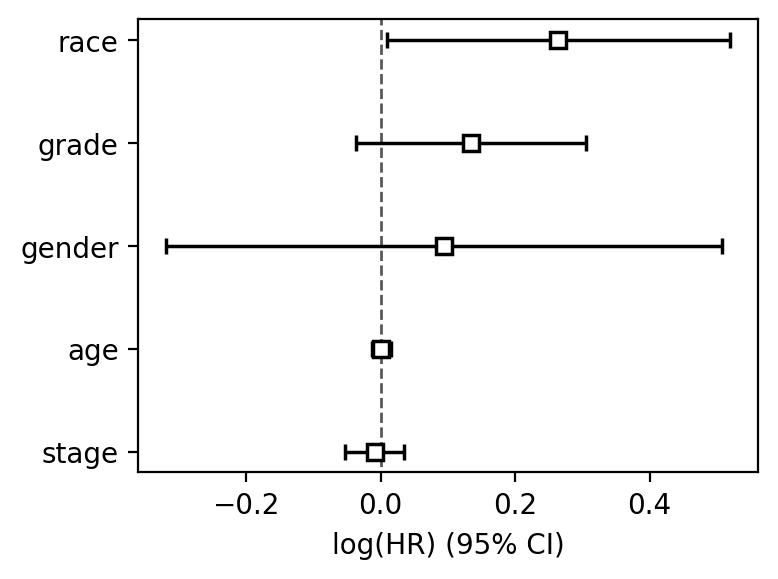

In [111]:
plt.figure(figsize=(4,3),dpi=200)
cph.plot()

In [59]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()

cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2020-09-28 07:25:12 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

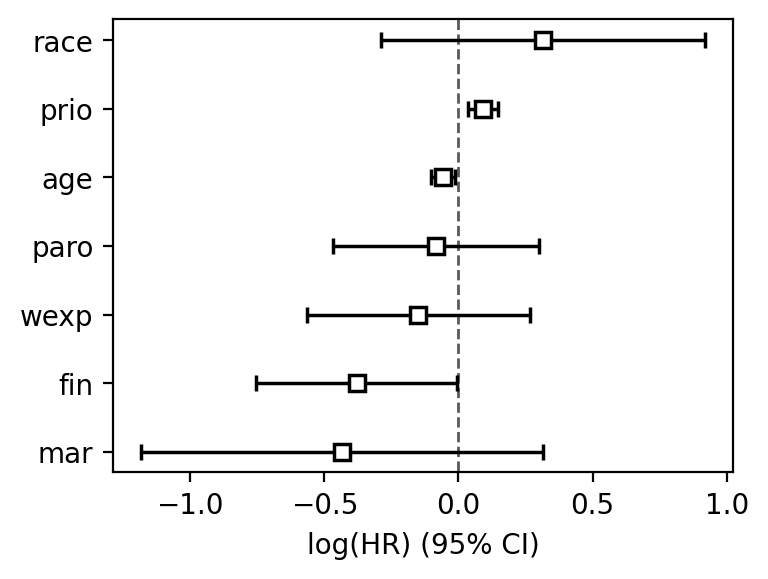

In [68]:
plt.figure(figsize=(4,3),dpi=200)
cph.plot()